<a href="https://colab.research.google.com/github/datajcthemax/playdata/blob/main/day22_K_Clustering%EA%B3%BC_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22번째 이야기
- K-Clustering과 PCA
- about 준지도학습
- TabNet
- 머신러닝 시작부터 끝까지 질의응답 미팅

In [ ]:
pip install pytorch-tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 46.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 1.13.1 w

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.__version__

'1.13.1+cu117'

In [ ]:
!nvidia-smi

Tue Apr 25 01:23:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd
import numpy as np
PATH = '/content/drive/MyDrive/datas/따릉이/train.csv'
data = pd.read_csv(PATH)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1328 non-null   int64  
 1   hour                    1328 non-null   int64  
 2   hour_bef_temperature    1328 non-null   float64
 3   hour_bef_precipitation  1328 non-null   float64
 4   hour_bef_windspeed      1328 non-null   float64
 5   hour_bef_humidity       1328 non-null   float64
 6   hour_bef_visibility     1328 non-null   float64
 7   hour_bef_ozone          1328 non-null   float64
 8   hour_bef_pm10           1328 non-null   float64
 9   hour_bef_pm2.5          1328 non-null   float64
 10  count                   1328 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 124.5 KB


In [ ]:
y = data.pop('count')
X = data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train.to_numpy(), y_test.to_numpy()

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
from pytorch_tabnet.pretraining import TabNetPretrainer
# TabNetPretrainer
unsupervised_model = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-3),
    mask_type='entmax', # "sparsemax"
    n_d=16,
    n_a=16,
)

unsupervised_model.fit(
    X_train=X_train,
    eval_set=[X_test],
    pretraining_ratio=0.8,
    batch_size=8, 

)


epoch 0  | loss: 90.4811 | val_0_unsup_loss_numpy: 6.5103302001953125|  0:00:04s
epoch 1  | loss: 46.07539| val_0_unsup_loss_numpy: 7.0673699378967285|  0:00:08s
epoch 2  | loss: 26.28803| val_0_unsup_loss_numpy: 10.599459648132324|  0:00:14s
epoch 3  | loss: 15.22267| val_0_unsup_loss_numpy: 19.490339279174805|  0:00:18s
epoch 4  | loss: 9.05638 | val_0_unsup_loss_numpy: 34.44620132446289|  0:00:22s
epoch 5  | loss: 5.61639 | val_0_unsup_loss_numpy: 38.08692932128906|  0:00:27s
epoch 6  | loss: 3.90101 | val_0_unsup_loss_numpy: 22.471580505371094|  0:00:31s
epoch 7  | loss: 3.44247 | val_0_unsup_loss_numpy: 8.96897029876709|  0:00:35s
epoch 8  | loss: 2.43568 | val_0_unsup_loss_numpy: 8.255060195922852|  0:00:41s
epoch 9  | loss: 2.11487 | val_0_unsup_loss_numpy: 11.721830368041992|  0:00:45s
epoch 10 | loss: 1.73192 | val_0_unsup_loss_numpy: 6.117280006408691|  0:00:49s
epoch 11 | loss: 1.49068 | val_0_unsup_loss_numpy: 9.515259742736816|  0:00:53s
epoch 12 | loss: 1.47648 | val_0_un

/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor

clf = TabNetRegressor(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-3),
    scheduler_params={"step_size":10, # how to use learning rate scheduler
                      "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    n_d=16,
    n_a=16,
    mask_type='sparsemax' # This will be overwritten if using pretrain model
)

clf.fit(
    X_train=X_train, y_train=y_train.reshape(-1,1),
    eval_set=[(X_train, y_train.reshape(-1,1)), (X_test, y_test.reshape(-1,1))],
    eval_name=['train', 'valid'],
    eval_metric=['rmse'],
    from_unsupervised=unsupervised_model,batch_size=8
)

/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/abstract_model.py:105: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/abstract_model.py:231: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 19183.5823| train_rmse: 136.56317| valid_rmse: 132.04221|  0:00:04s
epoch 1  | loss: 18110.05398| train_rmse: 132.86728| valid_rmse: 128.48574|  0:00:09s
epoch 2  | loss: 17053.71739| train_rmse: 128.26109| valid_rmse: 124.15265|  0:00:14s
epoch 3  | loss: 15485.28363| train_rmse: 122.20308| valid_rmse: 118.59199|  0:00:18s
epoch 4  | loss: 13798.22627| train_rmse: 114.19776| valid_rmse: 110.11654|  0:00:23s
epoch 5  | loss: 11750.20294| train_rmse: 104.85149| valid_rmse: 101.79801|  0:00:28s
epoch 6  | loss: 9798.06419| train_rmse: 95.42221| valid_rmse: 93.16983|  0:00:32s
epoch 7  | loss: 8260.99331| train_rmse: 86.76161| valid_rmse: 84.78291|  0:00:37s
epoch 8  | loss: 6905.67157| train_rmse: 78.60186| valid_rmse: 77.13484|  0:00:42s
epoch 9  | loss: 5611.72271| train_rmse: 72.87195| valid_rmse: 71.55111|  0:00:46s
epoch 10 | loss: 4755.88842| train_rmse: 68.08337| valid_rmse: 66.72838|  0:00:51s
epoch 11 | loss: 4347.78094| train_rmse: 63.38654| valid_rmse: 61.9562

/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
from sklearn.metrics import r2_score
pred = clf.predict(X_test)

In [ ]:
r2_score(y_test, pred)

0.5993483278085271

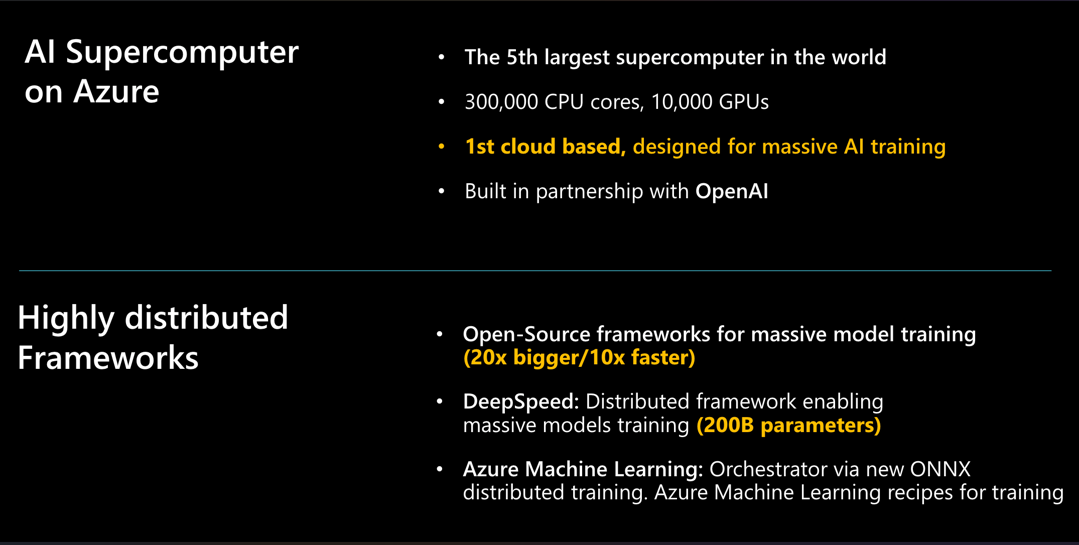

# Cuda Toolkit : gpu 가속
# Cuda Cudnn : 더 빠르게

In [ ]:
!nvidia-smi

Tue Apr 25 05:15:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.__version__

'2.0.0+cu118'

In [ ]:
torch.cuda.is_available()

True

In [ ]:
import numpy as np
np.float32

numpy.float32

In [ ]:
np.float16

numpy.float16